In [29]:
%config IPCompleter.greedy=True

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


# Zadanie 5

## a)
W tym zadaniu należało stwierdzić, jak dobór funkcji $m$ dla multizbioru $\mathfrak{M} = (S, m)$ wpływa na wartość estymacji $\hat{n}$.

## b)
W tej części zadania 5. należało dla $k \in \{1, 2, 3, 100, 400 \}$ i $n = 1, \dots, 10^4$ sprawdzić wyniki zwracane przez algorytm $\texttt{MinCount}$. Na podstawie otrzymanych wyników wyliczono stosunek $\frac{\hat{n}}{n}$.

In [31]:
data_5b = pd.read_csv('data/5b.csv')
data_5b['estimated/n'] = data_5b['estimated'] / data_5b['n']
data_5b


,k,n,expected,estimated,estimated/n
0,2,1,1,1,1.000000
1,2,2,2,2,1.000000
2,2,3,3,1,0.333333
3,2,4,4,6,1.500000
4,2,5,5,14,2.800000
...,...,...,...,...,...
49995,400,9996,9996,10132,1.013605
49996,400,9997,9997,10362,1.036511
49997,400,9998,9998,9117,0.911882
49998,400,9999,9999,9786,0.978698


Text(0.5, 1.0, 'k=400')

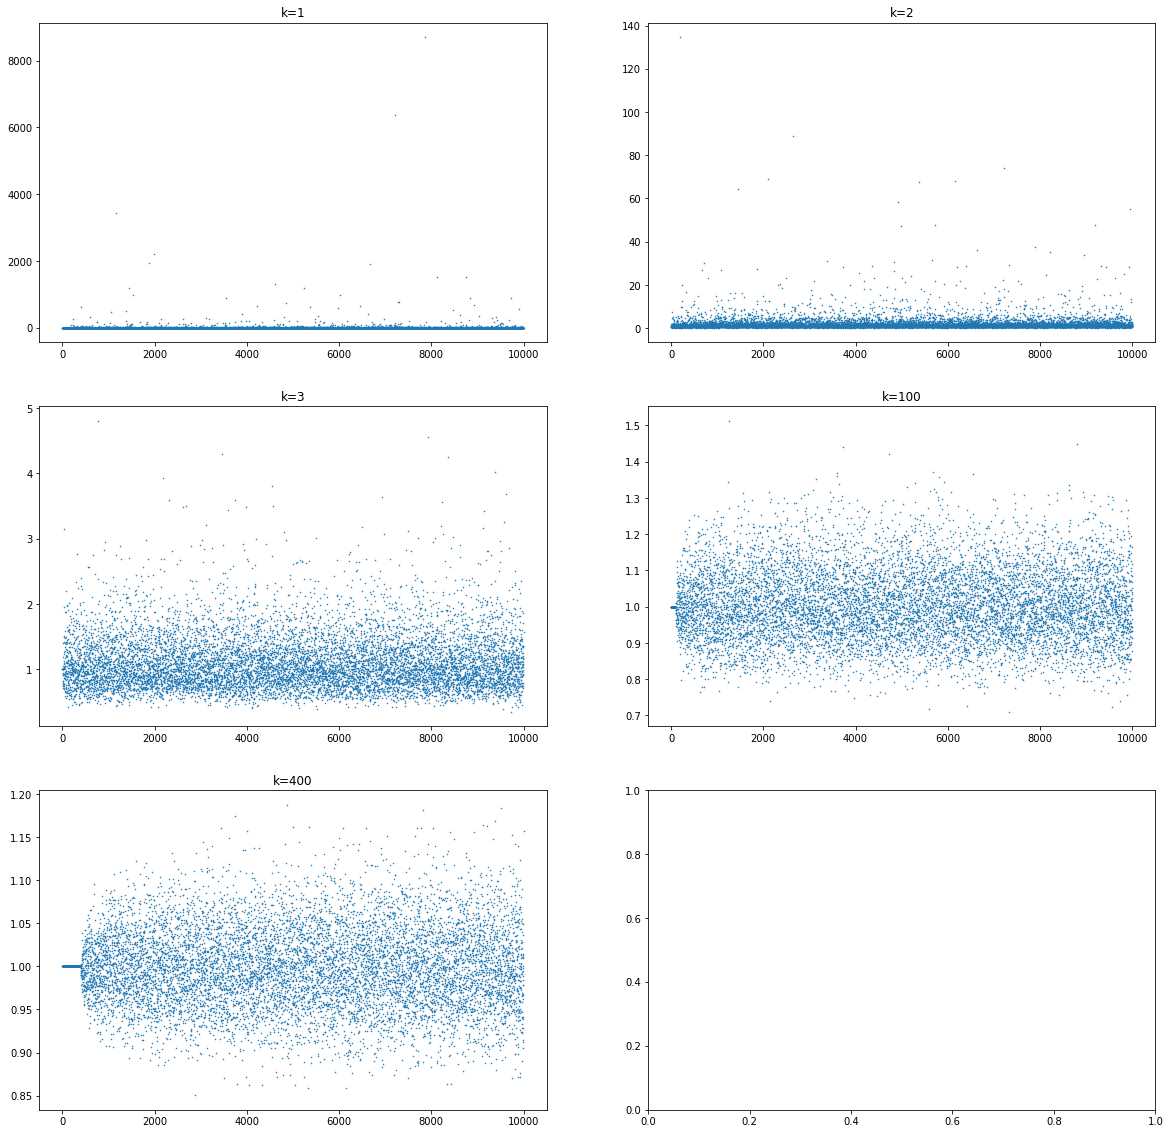

In [32]:
x = np.linspace(1, 10000, 10000)
fig, ax = plt.subplots(3, 2, figsize=(20,20))
size = 0.3
ax[0, 0].scatter(x, data_5b['estimated/n'][0:10000], s=size)
ax[0, 0].set_title("k=1")
ax[0, 1].scatter(x, data_5b['estimated/n'][10000:20000], s=size)
ax[0, 1].set_title("k=2")
ax[1, 0].scatter(x, data_5b['estimated/n'][20000:30000], s=size)
ax[1, 0].set_title("k=3")
ax[1, 1].scatter(x, data_5b['estimated/n'][30000:40000], s=size)
ax[1, 1].set_title("k=100")
ax[2, 0].scatter(x, data_5b['estimated/n'][40000:50000], s=size)
ax[2, 0].set_title("k=400")


## c)

W tym zadaniu należało eksperymentalnie wyznaczyć wartość $k$, dla którego zachodzi zależność $|\frac{\hat{n}}{n} - 1| < 10$%

In [33]:
data_5c = pd.read_csv('data/5c.csv')
data_5c['ratio'] = abs((data_5c['estimated'] / data_5c['n']) - 1.0) < 0.1
data_5c


,k,n,expected,estimated,ratio
0,275,1,1,1,True
1,275,2,2,2,True
2,275,3,3,3,True
3,275,4,4,4,True
4,275,5,5,5,True
...,...,...,...,...,...
29995,290,9996,9996,10086,True
29996,290,9997,9997,10567,True
29997,290,9998,9998,9218,True
29998,290,9999,9999,9316,True


In [34]:
summary_5c = data_5c.groupby('k').agg([np.mean])
summary_5c

,n,expected,estimated,ratio
,mean,mean,mean,mean
k,,,,
275,5000.5,5000.5,4999.0630,0.9198
280,5000.5,5000.5,4998.8724,0.9238
290,5000.5,5000.5,4998.7717,0.9288


# Zadanie 6

W tem zadaniu należało dla $k \in \{1, 2, 3, 100, 400 \}$ i $n = 1, \dots, 10^4$ sprawdzić wyniki zwracane przez algorytm $\texttt{MinCount}$. Próby przeprowadzony dla funkcji haszujących - MD5, SHA1, SHA256 oraz SHA512. Celem zadania było sprawdzenie jak długość hasha wpływa na jakość otrzymywanych wyników. Długości otrzymywanych hashy skracano do odpowiedniej liczby bitów $b \in \{8, 16, 32, 64, 128, 256 \}$

In [35]:
data_6 = pd.read_csv('data/6.csv')
data_6['diff'] = abs((data_6['expected'] - data_6['estimated']) / data_6['expected'])
data_6


,hash,b,expected,estimated,diff
0,sha512,8,10000,254,0.9746
1,sha512,8,10000,254,0.9746
2,sha512,8,10000,254,0.9746
3,sha512,8,10000,254,0.9746
4,sha512,8,10000,254,0.9746
...,...,...,...,...,...
23995,sha256,256,10000,10713,0.0713
23996,sha256,256,10000,10713,0.0713
23997,sha256,256,10000,10713,0.0713
23998,sha256,256,10000,10713,0.0713


In [36]:
summary_6 = data_6.groupby(['hash', 'b']).agg([np.min, np.max, np.mean])
summary_6


expected               estimated                  diff          \
               amin   amax   mean      amin   amax   mean    amin    amax   
hash   b                                                                    
md5    8      10000  10000  10000       254    254    254  0.9746  0.9746   
       16     10000  10000  10000      9187   9187   9187  0.0813  0.0813   
       32     10000  10000  10000      9913   9913   9913  0.0087  0.0087   
       64     10000  10000  10000      9913   9913   9913  0.0087  0.0087   
       128    10000  10000  10000      9259   9259   9259  0.0741  0.0741   
       256    10000  10000  10000      9259   9259   9259  0.0741  0.0741   
sha1   8      10000  10000  10000       254    254    254  0.9746  0.9746   
       16     10000  10000  10000      8506   8506   8506  0.1494  0.1494   
       32     10000  10000  10000      8943   8943   8943  0.1057  0.1057   
       64     10000  10000  10000      8943   8943   8943  0.1057  0.1057   
       128    10000  10000  10000     10701  10701  10701  0.0701  0.0701   
       256    10000  10000  10000      9582   9582   9582  0.0418  0.0418   
sha256 8      10000  10000  10000       254    254    254  0.9746  0.9746   
       16     10000  10000  10000      8745   8745   8745  0.1255  0.1255   
       32     10000  10000  10000      9311   9311   9311  0.0689  0.0689   
       64     10000  10000  10000      9311   9311   9311  0.0689  0.0689   
       128    10000  10000  10000     10058  10058  10058  0.0058  0.0058   
       256    10000  10000  10000     10713  10713  10713  0.0713  0.0713   
sha512 8      10000  10000  10000       254    254    254  0.9746  0.9746   
       16     10000  10000  10000      9233   9233   9233  0.0767  0.0767   
       32     10000  10000  10000      9761   9761   9761  0.0239  0.0239   
       64     10000  10000  10000      9761   9761   9761  0.0239  0.0239   
       128    10000  10000  10000     10579  10579  10579  0.0579  0.0579   
       256    10000  10000  10000      9930   9930   9930  0.0070  0.0070   

                    
              mean  
hash   b            
md5    8    0.9746  
       16   0.0813  
       32   0.0087  
       64   0.0087  
       128  0.0741  
       256  0.0741  
sha1   8    0.9746  
       16   0.1494  
       32   0.1057  
       64   0.1057  
       128  0.0701  
       256  0.0418  
sha256 8    0.9746  
       16   0.1255  
       32   0.0689  
       64   0.0689  
       128  0.0058  
       256  0.0713  
sha512 8    0.9746  
       16   0.0767  
       32   0.0239  
       64   0.0239  
       128  0.0579  
       256  0.0070

# Zadanie 7

W tym zadaniu należało porównać teoretyczne wyniki koncentracji estymatora $\hat{n}$ wykorzystaując nierówności **Czebyszewa** i **Chernoffa**. Dla $n = 1, \ldots, 10^4$ i $\alpha = 5$%, $1$%, $0.5$% przy założeniu, że:

$\mathrm{Pr}[1 - \delta < \frac{\hat{n}}{n} < 1 + \delta] > 1 - \alpha$

## Nierówność Czebyszewa

$\mathrm{Pr}[1 - \delta < \frac{\hat{n}}{n} < 1 + \delta] > 1 - \alpha$

Przekształcamy:

$n - n\delta < \hat{n} < n + n\delta$

$-n\delta < \hat{n} - n < n\delta$

Nierowność Czebyszewa ma postać $P(|X - E(X)| < a) > 1 - \frac{\mathrm{Var}(X)}{a^2}$.

Łatwo zauważyć, że $P(|X - E(X)| < a)$ możemy równoważnie zapisać jako $P(-a < X - E(X) < a)$. Porówując to z powyższymi obliczeniami zauważamy, że $a = n\delta$, a $\alpha = \frac{\mathrm{Var}(X)}{a^2}$. 



Po wykonaniu odpowiednich przekształceń otrzymujemy, że $\delta = \sqrt{\frac{n - k + 1}{n\alpha(k-2)}}$.

# Nierówność Chernoffa 

Nierówność ta zadana jest wzorem: $P(|\frac{\hat{n}}{n} - 1| \geq \delta) \leq 2e^{-\frac{n\delta^2}{3}}$. Przyjmijmy $\alpha = 2e^{-\frac{n\delta^2}{3}}$. Wykonując podobne przekształcenia, jak w przypadku nierówności Czebyszewa, otrzymujemy, że $\delta = \sqrt{-\frac{3\log(\frac{\alpha}{2})}{n}}$

In [37]:
def chebyschew(n, k, alpha):
    return np.sqrt((n - k + 1) / (n * (k - 2))) / np.sqrt(alpha)


In [38]:
def chernoff(n, alpha):
    return np.sqrt(- (3 * np.log(alpha / 2)) / n)


In [39]:
def chebyschew_bounds(ns, k, alpha):
    delta = chebyschew(ns, k, alpha)
    return (1.0 - delta, 1.0 + delta)


In [40]:
def chernoff_bounds(ns, alpha):
    delta = chernoff(ns, alpha)
    return (1.0 - delta, 1.0 + delta)


In [48]:
def exact_chernoff_bounds(n, alpha, delta):
    ones = np.ones(n)
    return ones - delta, ones + delta

In [41]:
n = 10000
k = 400
alphas = [0.005, 0.01, 0.05]

deltas = {
    0.005: 0.191504,
    0.01: 0.227158,
    0.05: 0.33625
}

In [42]:
data_7 = pd.read_csv('data/5b.csv')[40000:40000 + n]
data_7


,k,n,expected,estimated
40000,400,1,1,1
40001,400,2,2,2
40002,400,3,3,3
40003,400,4,4,4
40004,400,5,5,5
...,...,...,...,...
49995,400,9996,9996,10132
49996,400,9997,9997,10362
49997,400,9998,9998,9117
49998,400,9999,9999,9786


In [43]:
summary_7 = data_7.groupby('k').agg([np.min, np.max])
summary_7



n        expected        estimated       
    amin   amax     amin   amax      amin   amax
k                                               
400    1  10000        1  10000         1  11573

In [44]:
data_7['estimated/n'] = data_7['estimated'] / data_7['n']


In [45]:
summary_7 = data_7.groupby('k').agg([np.min, np.max])
summary_7



n        expected        estimated        estimated/n          
    amin   amax     amin   amax      amin   amax        amin      amax
k                                                                     
400    1  10000        1  10000         1  11573    0.850383  1.187666

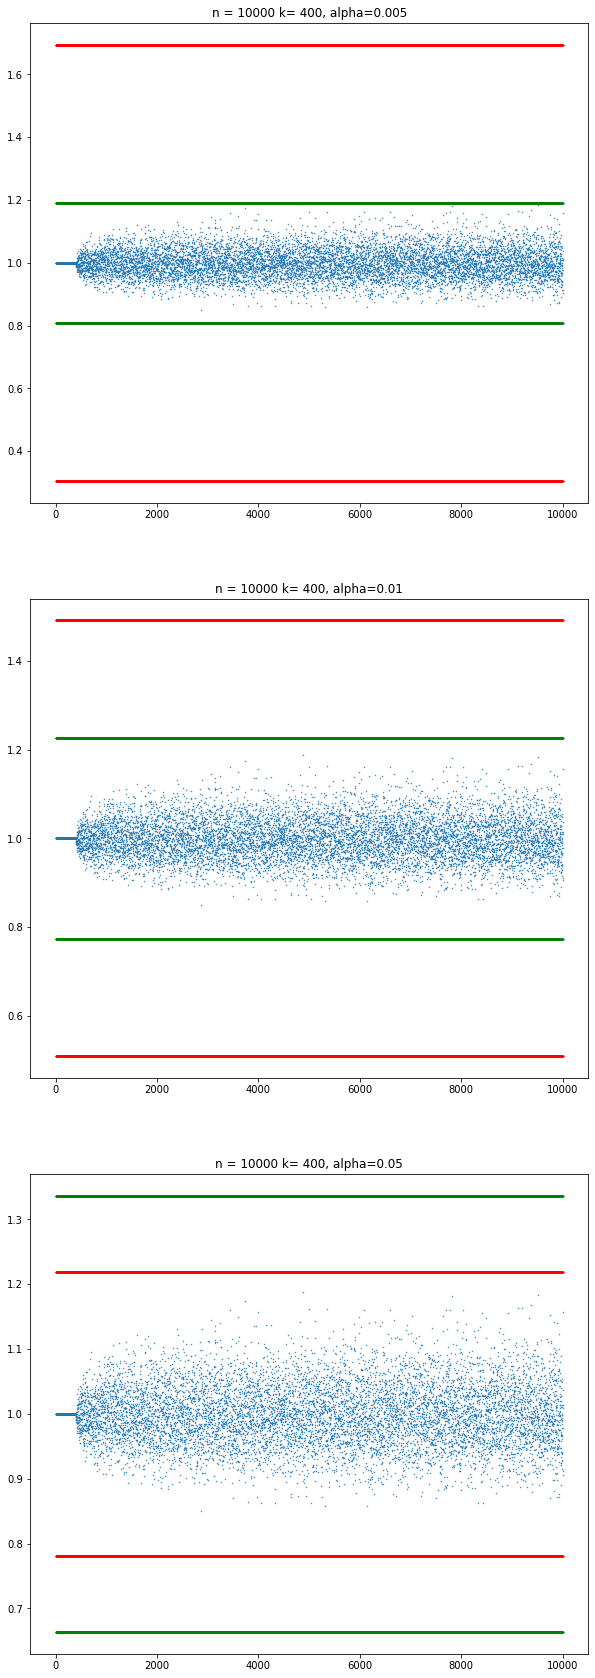

In [49]:
x = np.linspace(1, n, n)
fig, ax = plt.subplots(3, figsize=(10,30))

for i in range(len(alphas)):
    alpha = alphas[i]
    ns = np.full(n, n)

    chebyschew_lower, chebyschew_upper = chebyschew_bounds(ns, k, alpha)
#     chernoff_lower, chernoff_upper = chernoff_bounds(ns, alpha)
    chernoff_lower, chernoff_upper = exact_chernoff_bounds(n, alpha, deltas[alpha])
    
    size = 0.2
    
    ax[i].set_title('n = {} k= {}, alpha={}'.format(n, k, alpha))
    ax[i].scatter(x, data_7['estimated/n'], s=size)
    ax[i].scatter(x, chernoff_lower, color='green', s=size)
    ax[i].scatter(x, chernoff_upper, color='green', s=size)
    ax[i].scatter(x, chebyschew_lower, color='red', s=size)
    ax[i].scatter(x, chebyschew_upper, color='red', s=size)
    
    